<h1>DATA LOADING</h1>

In [9]:
import pandas as pd

df=pd.read_csv("sales_data.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [10]:
df.info

<bound method DataFrame.info of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520      

In [11]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [12]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [98]:
df['Ship Date']=pd.to_datetime(df['Ship Date'],format='%d/%m/%y')
df['Order Date']=pd.to_datetime(df['Order Date'],format='%d/%m/%y')

In [102]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

In [32]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [34]:
Category = df.loc[:,["Category","Sub-Category","Product Name"]]

In [36]:
Category.describe()

,Category,Sub-Category,Product Name
count,9800,9800,9800
unique,3,17,1849
top,Office Supplies,Binders,Staple envelope
freq,5909,1492,47


In [38]:
Category["Category"].info

<bound method Series.info of 0             Furniture
1             Furniture
2       Office Supplies
3             Furniture
4       Office Supplies
             ...       
9795    Office Supplies
9796    Office Supplies
9797         Technology
9798         Technology
9799         Technology
Name: Category, Length: 9800, dtype: object>

In [40]:
Category["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

<h1>Furniture sub-category</h1>

In [43]:
Furniture=df[(df["Category"]=="Furniture")]

In [45]:
Furniture_list=Furniture["Sub-Category"].unique()

In [47]:
print(f"Furniture_list:{Furniture_list}")

Furniture_list:['Bookcases' 'Chairs' 'Tables' 'Furnishings']


<h1> Office Supplies sub-category</h1>

In [50]:
Office_Supplies=df[(df["Category"]=="Office Supplies")]

In [52]:
Office_Supplies_list=Office_Supplies["Sub-Category"].unique()

In [54]:
print(f"Office_Supplies_list:{Office_Supplies_list}")

Office_Supplies_list:['Labels' 'Storage' 'Art' 'Binders' 'Appliances' 'Paper' 'Envelopes'
 'Fasteners' 'Supplies']


<h1>Technology sub-cayegory</h1>

In [57]:
Technology=df[(df["Category"]=="Technology")]

In [59]:
Technology_list=Technology["Sub-Category"].unique()

In [61]:
print(f"Technology_list:{Technology_list}")

Technology_list:['Phones' 'Accessories' 'Machines' 'Copiers']


<h1>price</h1>

In [64]:
price=df.groupby(["Category"])["Sales"]

In [66]:
price.head()

0      261.9600
1      731.9400
2       14.6200
3      957.5775
4       22.3680
5       48.8600
6        7.2800
7      907.1520
8       18.5040
9      114.9000
10    1706.1840
11     911.4240
19     213.4800
26      90.5700
35    1097.5440
Name: Sales, dtype: float64

In [68]:
category_sales=price.agg(['sum','mean','count'])
category_sales.astype(int)

,sum,mean,count
Category,,,
Furniture,728658,350,2078
Office Supplies,705422,119,5909
Technology,827455,456,1813


<h1>1. Sales Analysis by Category</h1>

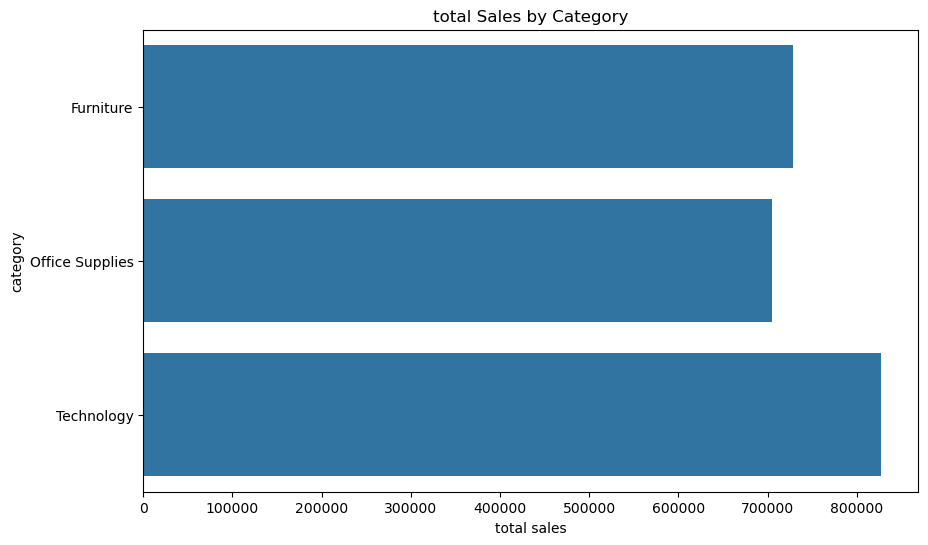

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.barplot(x=category_sales['sum'],y=category_sales.index)
plt.xlabel("total sales")
plt.ylabel("category")
plt.title("total Sales by Category")
plt.show()

<h1>Top Selling Products</h1>

In [73]:
top_product=df.groupby(['Product Name'])['Sales'].sum().sort_values(ascending=False).head()
top_product

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64

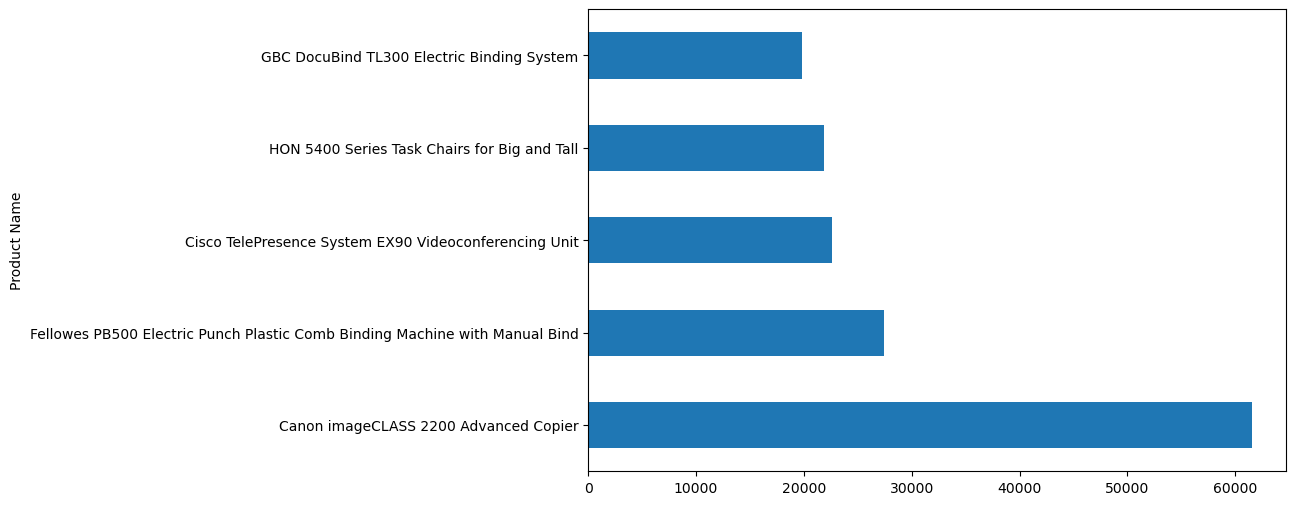

In [366]:
plt.figure(figsize=(9,6))
top_product.plot(kind='barh')
plt.show()

<h1>Sales Trend Over Time</h1>

In [112]:
df['yearmonth']=df["Order Date"].dt.to_period('M')
monthly_sales=df.groupby(['yearmonth','Product Name'])['Sales'].sum()
monthly_sales

yearmonth  Product Name                                                                                       
2015-01    3-ring staple pack                                                                                       5.640
           3M Hangers With Command Adhesive                                                                        22.200
           4009 Highlighters by Sanford                                                                            19.900
           9-3/4 Diameter Round Wall Clock                                                                         44.128
           AT&T 841000 Phone                                                                                      124.200
                                                                                                                   ...   
2018-12    Xerox 214                                                                                               19.440
           Xerox 227               

In [114]:
df['yearmonth']

0       2017-08
1       2017-08
2       2017-12
3       2016-11
4       2016-11
         ...   
9795    2017-05
9796    2016-12
9797    2016-12
9798    2016-12
9799    2016-12
Name: yearmonth, Length: 9800, dtype: period[M]

In [116]:
monthly_sales.sort_values(ascending=False).head()

yearmonth  Product Name                                         
2015-03    Cisco TelePresence System EX90 Videoconferencing Unit    22638.480
2017-02    Canon imageCLASS 2200 Advanced Copier                    17499.950
2018-03    Canon imageCLASS 2200 Advanced Copier                    13999.960
2018-10    Canon imageCLASS 2200 Advanced Copier                    11199.968
2018-11    Canon imageCLASS 2200 Advanced Copier                    10499.970
Name: Sales, dtype: float64

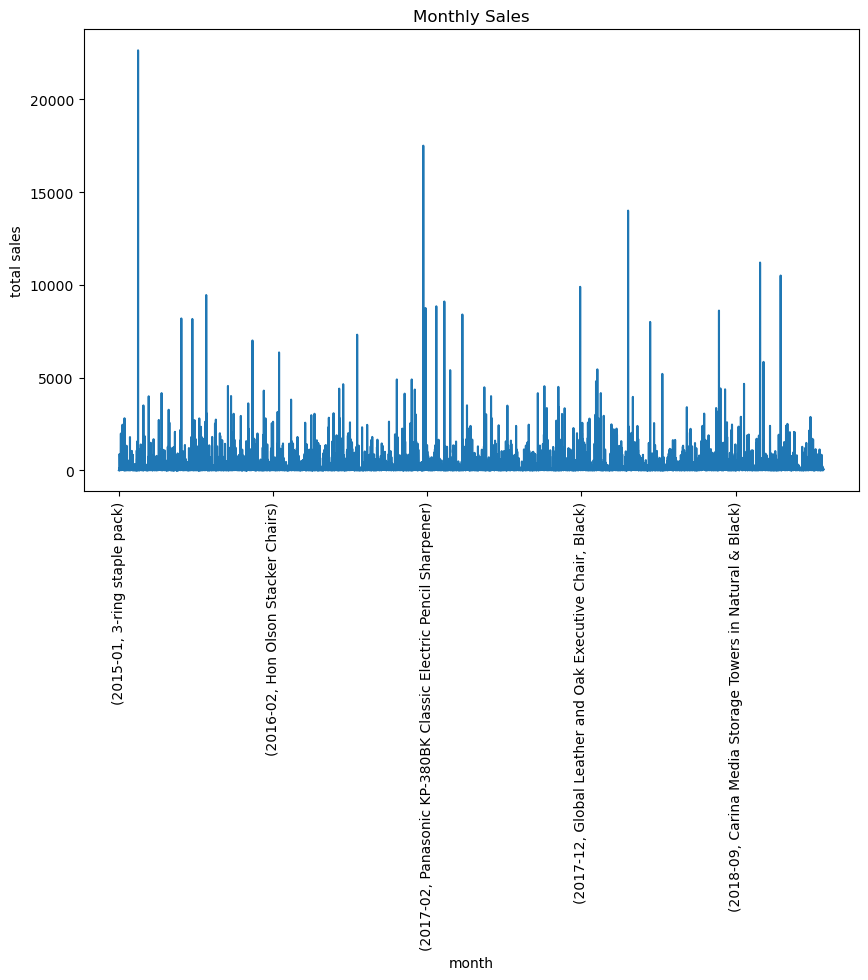

In [362]:
plt.figure(figsize=(10,6))

monthly_sales.plot()
plt.xlabel("month")
plt.ylabel("total sales")
plt.title("Monthly Sales")
plt.xticks(rotation=90)
plt.show()


<h1>Customer Analysis</h1>

In [147]:
Customer_analysis=df.groupby(['Customer Name','Product Name' ])['Sales'].sum().sort_values(ascending=False).head()
Customer_analysis

Customer Name  Product Name                                         
Sean Miller    Cisco TelePresence System EX90 Videoconferencing Unit    22638.480
Tamara Chand   Canon imageCLASS 2200 Advanced Copier                    17499.950
Raymond Buch   Canon imageCLASS 2200 Advanced Copier                    13999.960
Tom Ashbrook   Canon imageCLASS 2200 Advanced Copier                    11199.968
Hunter Lopez   Canon imageCLASS 2200 Advanced Copier                    10499.970
Name: Sales, dtype: float64

<h1> Regional Analysis</h1>

In [193]:
Regional_Analysis=df.groupby(['Region','Sub-Category'])['Sales'].sum()
Regional_Analysis
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

<h1>South Region</h1>

In [203]:
Regional_Analysis['South'].sort_values(ascending=False)


Sub-Category
Phones         58098.338
Machines       53890.960
Chairs         44739.246
Tables         43830.212
Binders        36734.365
Storage        35251.100
Accessories    26906.154
Appliances     19525.326
Furnishings    17062.660
Paper          13891.576
Bookcases      10899.362
Copiers         9299.756
Supplies        8318.928
Art             4510.424
Envelopes       3345.556
Labels          2344.180
Fasteners        503.316
Name: Sales, dtype: float64

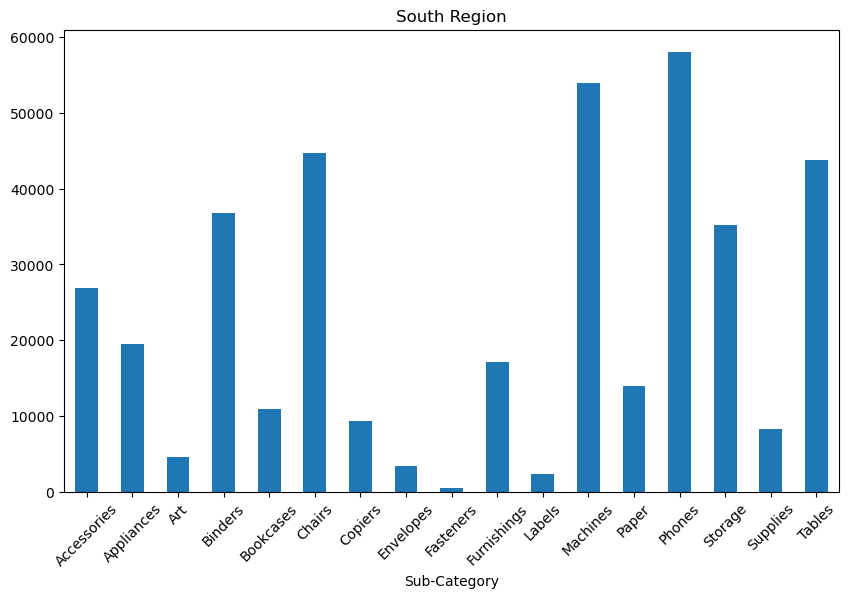

In [346]:
plt.figure(figsize=(10,6))
Regional_Analysis['South'].plot(kind='bar' )
plt.title('South Region')
plt.xticks(rotation=45)
plt.show()

<h1>Central Region</h1>

In [184]:
Regional_Analysis['Central'].sort_values(ascending=False)

Sub-Category
Chairs         82372.7760
Phones         71939.9520
Binders        56865.0120
Storage        45407.4400
Tables         39154.9710
Copiers        37259.5700
Accessories    32742.3020
Machines       26797.3840
Bookcases      23773.7112
Appliances     21176.8330
Paper          17184.9880
Furnishings    15016.0040
Supplies        9467.3720
Art             5746.1880
Envelopes       4537.3040
Labels          2435.5360
Fasteners        769.5700
Name: Sales, dtype: float64

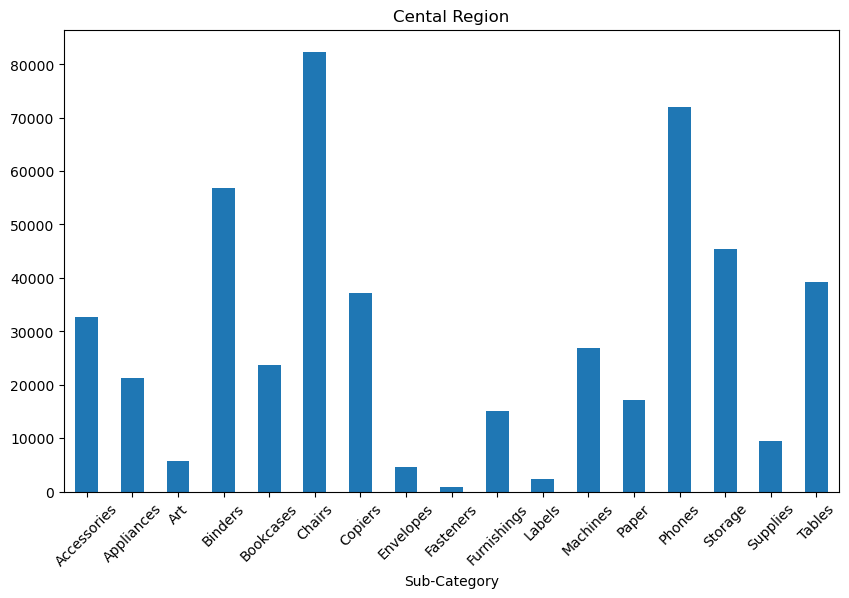

In [344]:
plt.figure(figsize=(10,6))
Regional_Analysis['Central'].plot(kind='bar' )
plt.title('Cental Region')
plt.xticks(rotation=45)
plt.show()

<h1>North Region</h1>

In [195]:
Regional_Analysis['West'].sort_values(ascending=False)


Sub-Category
Chairs         100023.2000
Phones          97859.4960
Tables          81016.2260
Storage         69256.1960
Accessories     60632.0060
Binders         55173.6330
Copiers         46469.3060
Machines        42444.1220
Bookcases       35320.7915
Appliances      29797.1660
Furnishings     28988.0280
Paper           26213.6260
Supplies        17978.6720
Art              9017.8240
Labels           5013.0960
Envelopes        4106.9400
Fasteners         909.3560
Name: Sales, dtype: float64

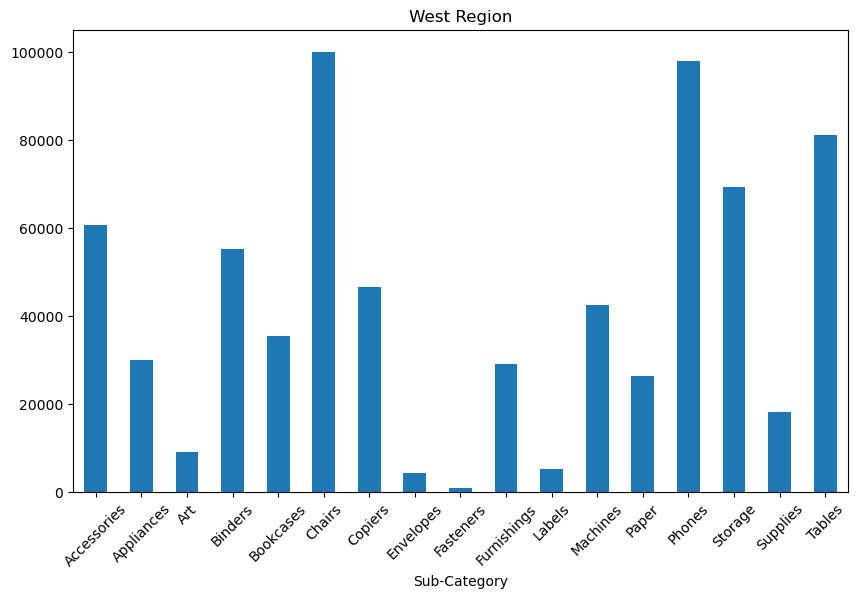

In [342]:
plt.figure(figsize=(10,6))
Regional_Analysis['West'].plot(kind='bar' )
plt.title('West Region')
plt.xticks(rotation=45)
plt.show()

<h1>East Region</h1>

In [198]:
Regional_Analysis['East'].sort_values(ascending=False)

Sub-Category
Phones         99884.662
Chairs         95687.509
Storage        69428.656
Machines       66106.165
Copiers        53219.462
Binders        51255.775
Accessories    43906.238
Bookcases      43819.334
Tables         38809.219
Appliances     34119.078
Furnishings    28145.326
Paper          19538.114
Supplies       10655.336
Art             7430.974
Envelopes       4138.246
Labels          2554.914
Fasteners        819.718
Name: Sales, dtype: float64

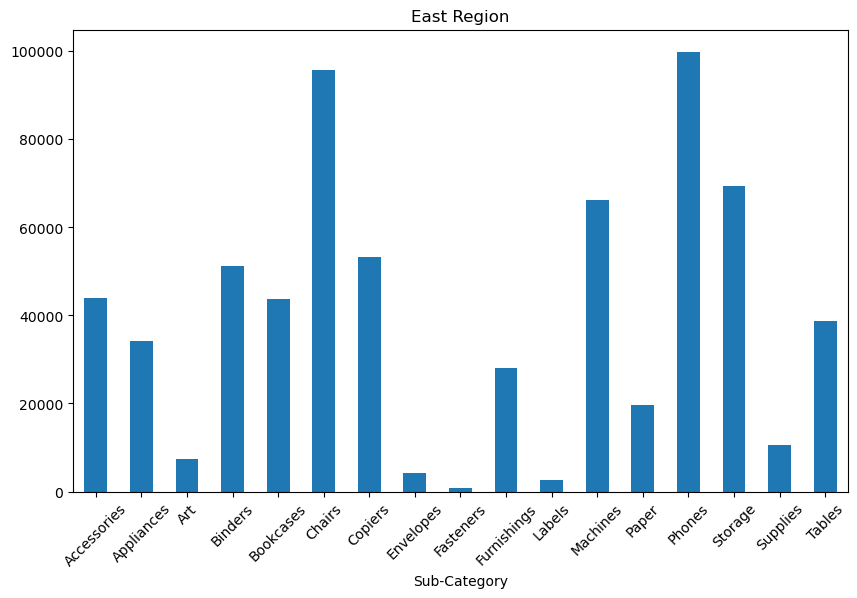

In [340]:
plt.figure(figsize=(10,6))
Regional_Analysis['East'].plot(kind='bar' )
plt.title('East Region')
plt.xticks(rotation=45)
plt.show()

<h1>total region</h1>

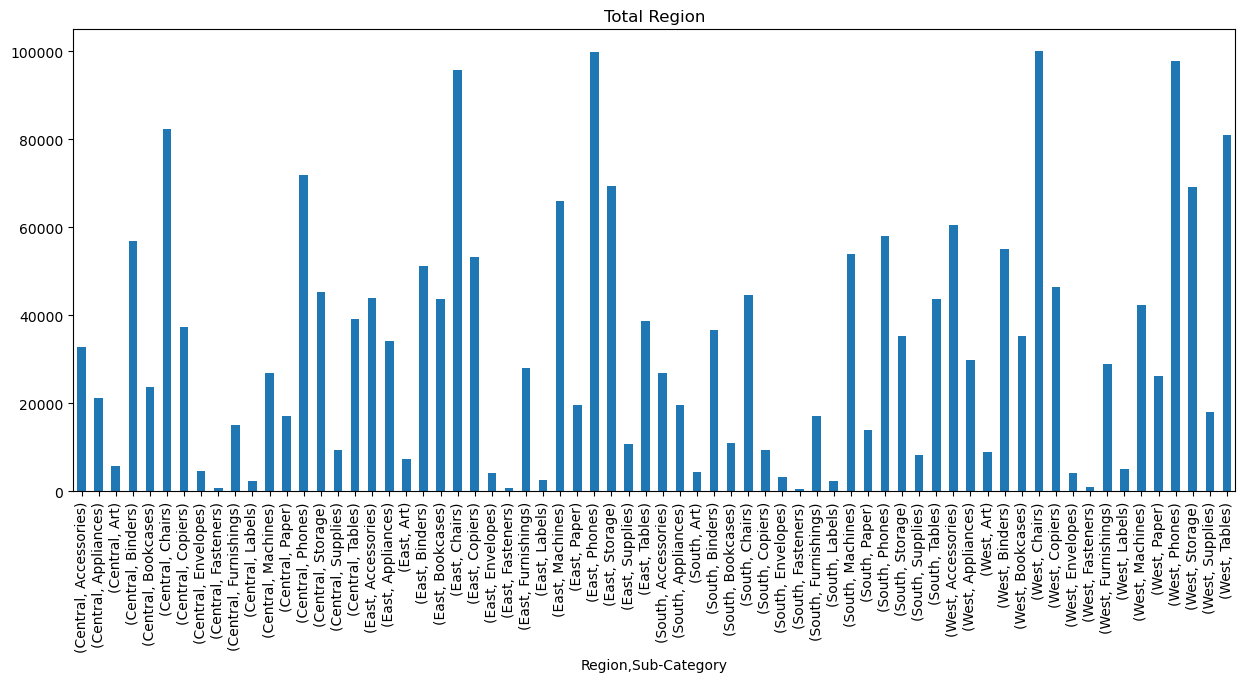

In [256]:
plt.figure(figsize=(15,6))
Regional_Analysis.plot(kind='bar' )
plt.title('Total Region')
plt.show()

<h1>Shipping Mode Analysis</h1>

In [269]:
Shipping_Mode =df.groupby(['Ship Mode'])['Sales'].agg(['sum','mean','count'])
Shipping_Mode

,sum,mean,count
Ship Mode,,,
First Class,3.455723e+05,230.228020,1501
Same Day,1.252190e+05,232.749143,538
Second Class,4.499142e+05,236.547939,1902
Standard Class,1.340831e+06,228.849856,5859


<h1>Segment Analysis</h1>

In [283]:
Segment_Analysis=df.groupby('Segment')['Sales'].agg(['sum','count','mean'])
Segment_Analysis

,sum,count,mean
Segment,,,
Consumer,1.148061e+06,5101,225.065777
Corporate,6.884941e+05,2953,233.150720
Home Office,4.249822e+05,1746,243.403309


<h1>Correlation between Order Date and Ship Date</h1>

In [307]:
df['processing_time']=(df['Ship Date']-df['Order Date']).dt.days
print("\nAverage Processing Time:", df['processing_time'].mean())
df.columns


Average Processing Time: 9.22265306122449


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'yearmonth', 'processing_time'],
      dtype='object')

<h1>Sales by State</h1>

In [319]:
Sales_by_State=df.groupby(['State'])['Sales'].sum().sort_values(ascending=False)
Sales_by_State.head(10)

State
California      446306.4635
New York        306361.1470
Texas           168572.5322
Washington      135206.8500
Pennsylvania    116276.6500
Florida          88436.5320
Illinois         79236.5170
Michigan         76136.0740
Ohio             75130.3500
Virginia         70636.7200
Name: Sales, dtype: float64

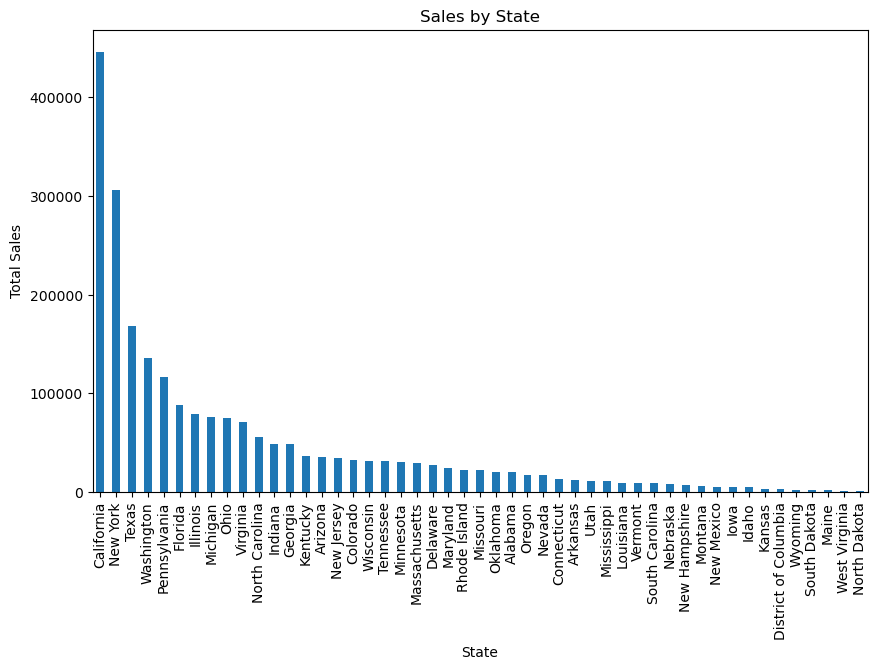

In [338]:
plt.figure(figsize=(10,6))
Sales_by_State.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title('Sales by State')
plt.show()


<h1>Profitability Analysis (assuming profit is not in data, using sales as proxy)</h1>

In [330]:
sub_category_Profit =df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
sub_category_Profit

Sub-Category
Phones         327782.4480
Chairs         322822.7310
Storage        219343.3920
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    164186.7000
Copiers        146248.0940
Bookcases      113813.1987
Appliances     104618.4030
Furnishings     89212.0180
Paper           76828.3040
Supplies        46420.3080
Art             26705.4100
Envelopes       16128.0460
Labels          12347.7260
Fasteners        3001.9600
Name: Sales, dtype: float64

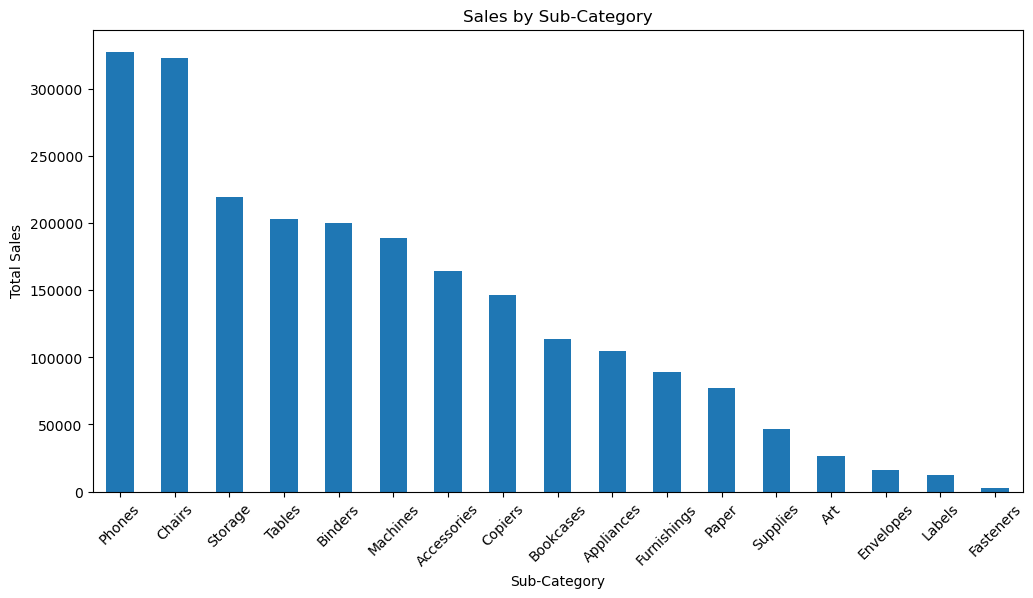

In [334]:
plt.figure(figsize=(12,6))
sub_category_Profit.plot(kind='bar')
plt.title('Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()